In [2]:
# Source: https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset
# Data format : csv file
# 2.2 million rows
# Load 200 rows, pass that as an argument 
# Visually examine the distribution of data in numerical columns
# The data file and the code should be in the same directory

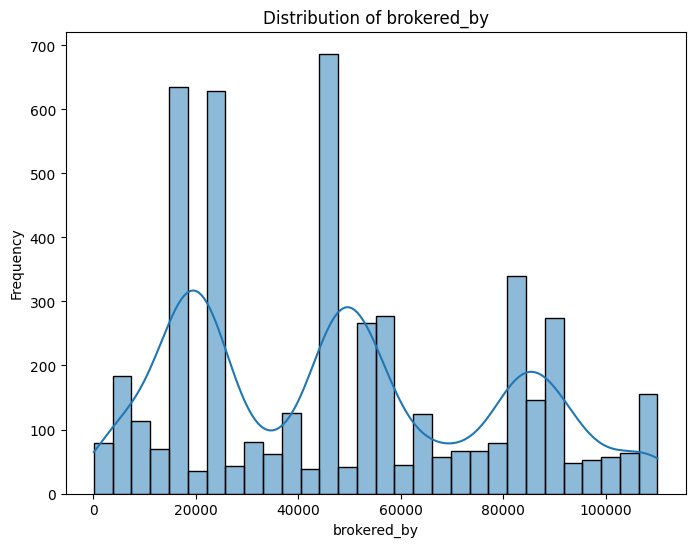

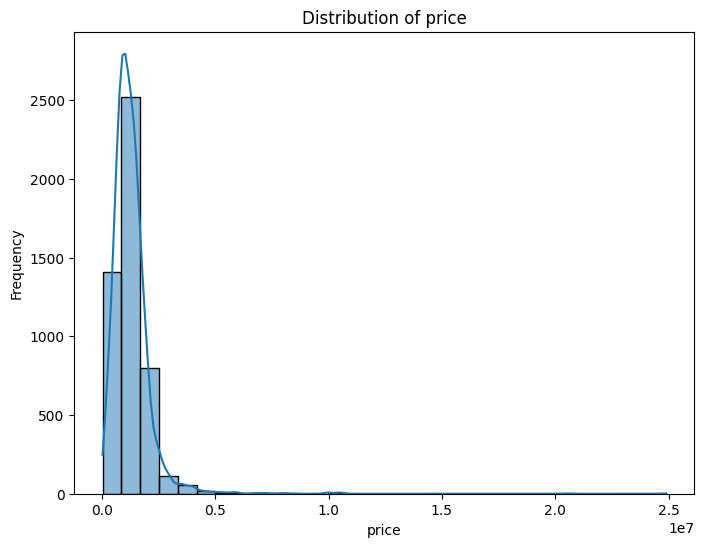

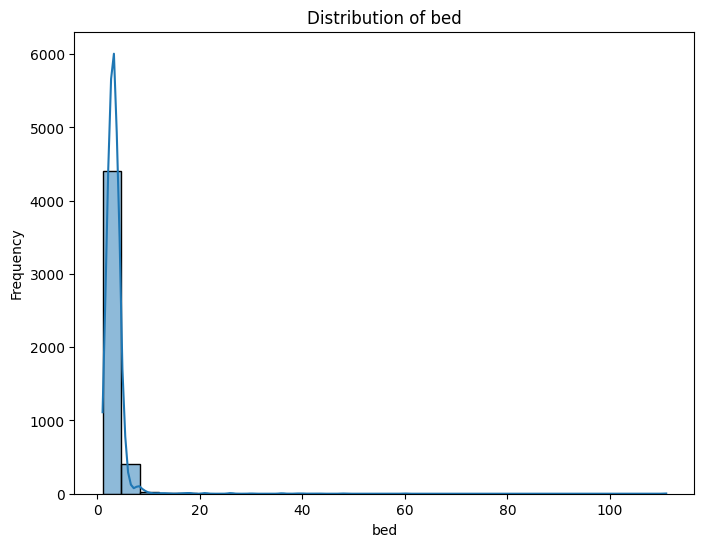

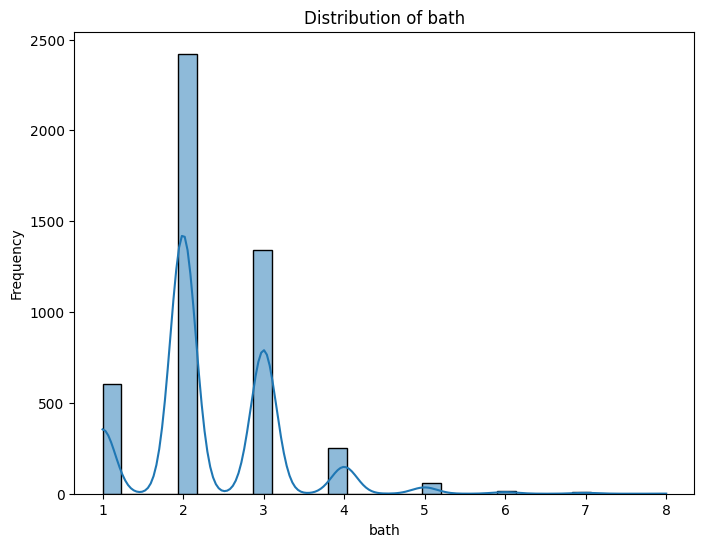

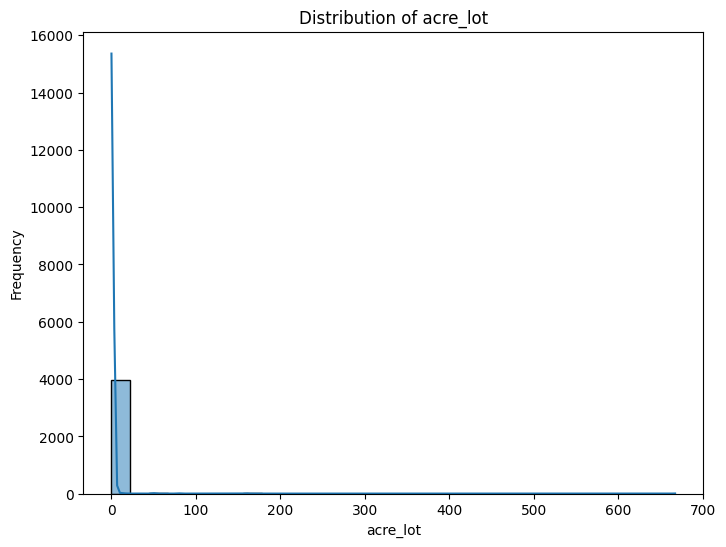

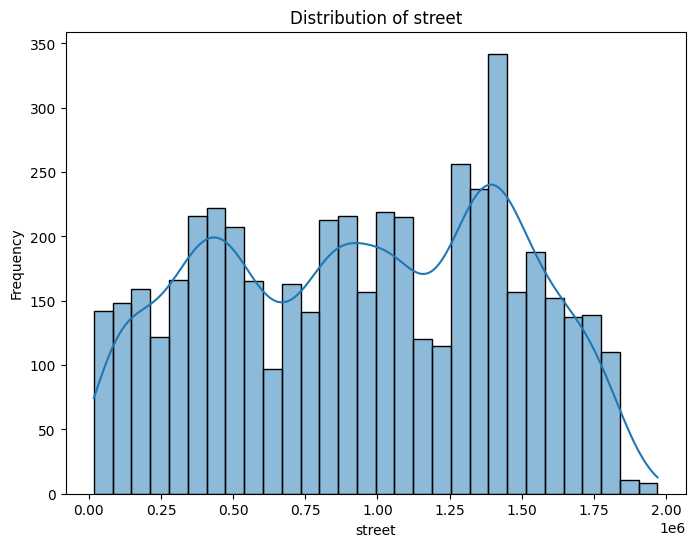

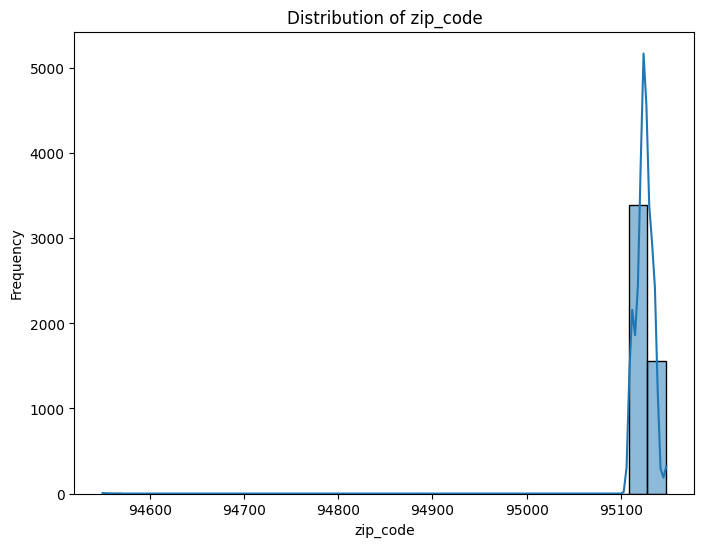

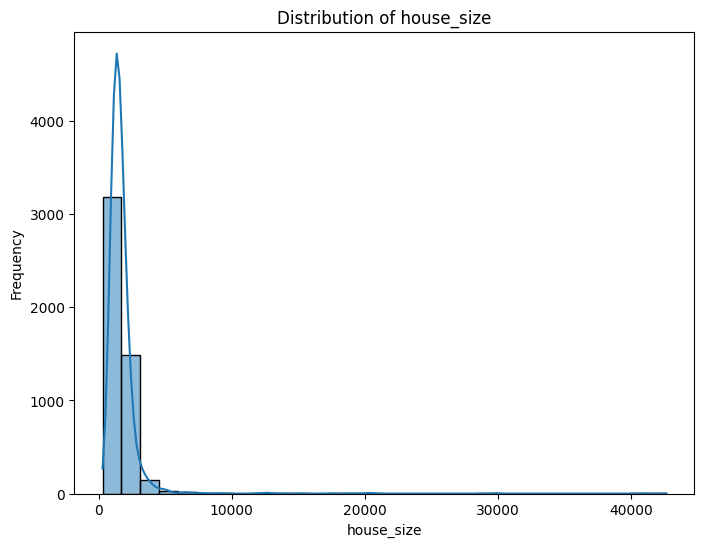

In [3]:
# CHANGE INPUT FROM csv file name to data frame

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to create distribution plots for each numerical column
def plot_numerical_distributions(df):
    
    
    
    # Loop through each column in the DataFrame
    for column in df.select_dtypes(include=['number']).columns:
        plt.figure(figsize=(8, 6))
        
        # Plot a distribution plot using seaborn
        sns.histplot(df[column], kde=True, bins=30)  # kde=True adds a kernel density estimate line
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        
        # Show the plot
        plt.show()

# Example usage: Replace 'your_file.csv' with the path to your CSV file
# DATA I/O
df = pd.read_csv('realtor-data.csv')
# Select all rows where the 'State' column is 'California'
df_CA = df[df['state'] == 'California']
df_CA.to_csv('Mini_Batch_Real_Estate_CA.csv')

df_CA_SanJose = df_CA[df_CA['city'] == 'San Jose']
df_CA_SanJose.to_csv('Mini_Batch_Real_Estate_CA_SanJose.csv')

# Display the filtered rows
df_CA.head()
plot_numerical_distributions(df_CA_SanJose)

In [4]:
df_CA_SanJose.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
1322526,53484.0,for_sale,1699888.0,3.0,2.0,0.14,841908.0,San Jose,California,95130.0,1467.0,2013-06-25
1322552,107449.0,for_sale,2380888.0,4.0,2.0,0.17,248433.0,San Jose,California,95129.0,1973.0,NaN
1322777,16048.0,for_sale,1199000.0,3.0,3.0,0.03,1294515.0,San Jose,California,95129.0,1348.0,2021-06-07
1322824,16829.0,for_sale,769950.0,2.0,2.0,NaN,1272132.0,San Jose,California,95129.0,1148.0,1984-07-10
1322922,62930.0,for_sale,4750000.0,4.0,2.0,0.63,1183581.0,San Jose,California,95117.0,3917.0,2022-09-30


In [15]:
# INPUT 

df = df_CA_SanJose

# Set 'target_column' as the name of the column you want to predict
target_column = 'price'

# Data Pre-Processing
non_numerical_columns =['status','city','state','prev_sold_date']

non_meaningful_numerical_columns=['brokered_by','street']

df=df.drop(columns=non_numerical_columns)
df=df.drop(columns=non_meaningful_numerical_columns)

df = df.dropna()

df.head()

,price,bed,bath,acre_lot,zip_code,house_size
1322526,1699888.0,3.0,2.0,0.14,95130.0,1467.0
1322552,2380888.0,4.0,2.0,0.17,95129.0,1973.0
1322777,1199000.0,3.0,3.0,0.03,95129.0,1348.0
1322922,4750000.0,4.0,2.0,0.63,95117.0,3917.0
1323034,1349000.0,2.0,2.0,0.04,95129.0,1149.0


In [16]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assume 'df' is your DataFrame with 12 columns, where 'target_column' is the column you want to predict

# Load or create your DataFrame here (e.g., df = pd.read_csv('data.csv'))

# Set 'target_column' as the name of the column you want to predict
#target_column = 'target_column'

# Separate features and target
X = df.drop(columns=[target_column])  # Features (other 11 columns)
y = df[target_column]  # Target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model (Random Forest Regressor in this example)
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print performance metrics
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 64541741636.93847
R^2 Score: 0.8492931478501516
